In [1]:
# GPU setting
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="6"

# modules setting

import numpy as np
import glob
import matplotlib.pyplot as plt
import tensorflow as tf
import time
import itertools
from sklearn.metrics import confusion_matrix

# Imort Model

In [2]:
class Model:  
    def __init__(self, model_path):
        self.test_graph = tf.Graph()
        with self.test_graph.as_default():
            self.sess = tf.Session(graph = self.test_graph)
            loader = tf.train.import_meta_graph(model_path + '.meta')
            loader.restore(self.sess, model_path)

            self.bn_prob = self.test_graph.get_tensor_by_name('bn_prob:0')
            self.x = self.test_graph.get_tensor_by_name('img:0')
            self.score = self.test_graph.get_tensor_by_name('dense/BiasAdd:0')

    def get_softmax(self, image):
        """
        image.shape = (None, 100, 100, 8)
        """
        softmax = self.sess.run(tf.nn.softmax(self.score), feed_dict={self.x: image, self.bn_prob: False})
        return softmax

In [3]:
model_dir = '/mnt/disk1/yunseob/courses/19-2_computer vision/model/HHT'
model = sorted(os.listdir(model_dir))
model = [i[:-5] for i in model if 'meta' in i and 'norm' not in i and '6000' not in i]

model

['hht_res50_1912141646_10660_val_acc_1.00_val_loss_0.000003',
 'hht_res50_1912141647_11460_val_acc_1.00_val_loss_0.000003',
 'hht_res50_1912141647_11600_val_acc_1.00_val_loss_0.000002',
 'hht_res50_1912141648_11990_val_acc_1.00_val_loss_0.000002',
 'hht_res50_1912141648_12130_val_acc_1.00_val_loss_0.000002',
 'hht_res50_1912141716_12010_val_acc_1.00_val_loss_0.000009',
 'hht_res50_1912141717_12100_val_acc_1.00_val_loss_0.000008',
 'hht_res50_1912141717_12150_val_acc_1.00_val_loss_0.000008',
 'hht_res50_1912141717_12490_val_acc_1.00_val_loss_0.000007',
 'hht_res50_1912141718_12770_val_acc_1.00_val_loss_0.000006',
 'hht_res50_1912141759_16210_val_acc_1.00_val_loss_0.000002',
 'hht_res50_1912141800_16560_val_acc_1.00_val_loss_0.000001',
 'hht_res50_1912141803_19360_val_acc_1.00_val_loss_0.000001',
 'hht_res50_1912141803_19540_val_acc_1.00_val_loss_0.000001',
 'hht_res50_1912141803_19730_val_acc_1.00_val_loss_0.000001',
 'hht_res50_1912142027_18220_val_acc_1.00_val_loss_0.000003',
 'hht_re

In [4]:
HHT_Res50_exp = Model(os.path.join(model_dir, model[-1]))

W1214 21:23:43.781019 140417406408448 deprecation.py:323] From /usr/local/lib/python3.5/dist-packages/tensorflow/python/training/saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


In [5]:
model = sorted(os.listdir(model_dir))
model = [i[:-5] for i in model if 'meta' in i and 'norm' in i]

model

['hht_res50_norm_1912141716_10870_val_acc_1.00_val_loss_0.000018',
 'hht_res50_norm_1912141716_10990_val_acc_1.00_val_loss_0.000017',
 'hht_res50_norm_1912141716_11150_val_acc_1.00_val_loss_0.000016',
 'hht_res50_norm_1912141717_11870_val_acc_1.00_val_loss_0.000012',
 'hht_res50_norm_1912141717_12020_val_acc_1.00_val_loss_0.000010',
 'hht_res50_norm_1912141800_18420_val_acc_1.00_val_loss_0.000003',
 'hht_res50_norm_1912141800_18550_val_acc_1.00_val_loss_0.000003',
 'hht_res50_norm_1912141800_18690_val_acc_1.00_val_loss_0.000003',
 'hht_res50_norm_1912141801_19110_val_acc_1.00_val_loss_0.000003',
 'hht_res50_norm_1912141801_19120_val_acc_1.00_val_loss_0.000002',
 'hht_res50_norm_1912142026_15090_val_acc_1.00_val_loss_0.000012',
 'hht_res50_norm_1912142027_16520_val_acc_1.00_val_loss_0.000010',
 'hht_res50_norm_1912142028_17360_val_acc_1.00_val_loss_0.000007',
 'hht_res50_norm_1912142028_17390_val_acc_1.00_val_loss_0.000007',
 'hht_res50_norm_1912142031_19880_val_acc_1.00_val_loss_0.0000

In [6]:
HHT_Res50_exp_n = Model(os.path.join(model_dir, model[-1]))

In [7]:
model = sorted(os.listdir(model_dir))
model = [i[:-5] for i in model if 'meta' in i and  '6000' in i]

model

['hht_res50_6000_1912142107_18940_val_acc_1.00_val_loss_0.000003',
 'hht_res50_6000_1912142108_19020_val_acc_1.00_val_loss_0.000003',
 'hht_res50_6000_1912142108_19080_val_acc_1.00_val_loss_0.000003',
 'hht_res50_6000_1912142108_19410_val_acc_1.00_val_loss_0.000002',
 'hht_res50_6000_1912142108_19740_val_acc_1.00_val_loss_0.000002']

In [8]:
HHT_Res50_lin = Model(os.path.join(model_dir, model[-1]))

In [47]:
model_dir = '/mnt/disk1/yunseob/courses/19-2_computer vision/model/STFT'

model = sorted(os.listdir(model_dir))
model = [i[:-5] for i in model if 'meta' in i]

model

['stft_1912012338_20_val_acc_0.35_val_loss_0.961170',
 'stft_1912012338_30_val_acc_0.50_val_loss_0.674982',
 'stft_1912012338_70_val_acc_0.73_val_loss_0.539413',
 'stft_1912012338_80_val_acc_1.00_val_loss_0.530640',
 'stft_1912012338_90_val_acc_1.00_val_loss_0.405714',
 'stft_1912012341_1230_val_acc_1.00_val_loss_0.000000',
 'stft_1912012341_1240_val_acc_1.00_val_loss_0.000000',
 'stft_1912012341_1250_val_acc_1.00_val_loss_0.000000',
 'stft_1912012341_1260_val_acc_1.00_val_loss_0.000000',
 'stft_1912012343_1010_val_acc_1.00_val_loss_0.000000',
 'stft_1912012343_1040_val_acc_1.00_val_loss_0.000000',
 'stft_1912012343_1050_val_acc_1.00_val_loss_0.000000',
 'stft_1912012343_1080_val_acc_1.00_val_loss_0.000000',
 'stft_1912012343_980_val_acc_1.00_val_loss_0.000000',
 'stft_res50_1912142322_19420_val_acc_1.00_val_loss_0.000002',
 'stft_res50_1912142322_19580_val_acc_1.00_val_loss_0.000001',
 'stft_res50_1912142322_19700_val_acc_1.00_val_loss_0.000001',
 'stft_res50_1912142322_19710_val_acc_

In [48]:
STFT_Res50_v1 = Model(os.path.join(model_dir, model[-1]))

In [65]:
model_dir = '/mnt/disk1/yunseob/courses/19-2_computer vision/model/STFT'

model = sorted(os.listdir(model_dir))
model = [i[:-5] for i in model if 'meta' in i and 'v2' in i]

model

['stft_v2_res50_1912142350_16480_val_acc_1.00_val_loss_0.000003',
 'stft_v2_res50_1912142350_16630_val_acc_1.00_val_loss_0.000003',
 'stft_v2_res50_1912142351_18210_val_acc_1.00_val_loss_0.000002',
 'stft_v2_res50_1912142351_19050_val_acc_1.00_val_loss_0.000002',
 'stft_v2_res50_1912142352_19400_val_acc_1.00_val_loss_0.000002']

In [66]:
STFT_Res50_v2 = Model(os.path.join(model_dir, model[-1]))

In [93]:
model_dir = '/mnt/disk1/yunseob/courses/19-2_computer vision/model/STFT'

model = sorted(os.listdir(model_dir))
model = [i[:-5] for i in model if 'meta' in i and 'vgg' in i]

model

[]

In [98]:
model_dir = '/mnt/disk1/yunseob/courses/19-2_computer vision/model/STFT'

model = sorted(os.listdir(model_dir))
model = [i[:-5] for i in model if 'meta' in i and 'stft_v2_res50' in i]

model

['stft_v2_res50_1912142350_16480_val_acc_1.00_val_loss_0.000003',
 'stft_v2_res50_1912142350_16630_val_acc_1.00_val_loss_0.000003',
 'stft_v2_res50_1912142351_18210_val_acc_1.00_val_loss_0.000002',
 'stft_v2_res50_1912142351_19050_val_acc_1.00_val_loss_0.000002',
 'stft_v2_res50_1912142352_19400_val_acc_1.00_val_loss_0.000002',
 'stft_v2_res50_1912150201_18960_val_acc_1.00_val_loss_0.000000',
 'stft_v2_res50_1912150202_19140_val_acc_1.00_val_loss_0.000000',
 'stft_v2_res50_1912150202_19680_val_acc_1.00_val_loss_0.000000',
 'stft_v2_res50_1912150202_19770_val_acc_1.00_val_loss_0.000000',
 'stft_v2_res50_1912150202_19780_val_acc_1.00_val_loss_0.000000']

In [99]:
STFT_v2_Res50_v2 = Model(os.path.join(model_dir, model[-1]))

# Load Data

In [9]:
def one_hot(data, classes, nb_classes = 2):
    one_hot = [0]*nb_classes
    one_hot[classes] = 1
    return np.vstack([one_hot for i in range(len(data))])

def reshapeAsimage(data):
    """
    inputshape = (Number, Channel, Height(f), Width(t))
    outputshape = (Number, Height(f), Width(t), Channel)
    """
    N, H, W, C = data.shape[0], data.shape[2], data.shape[3], data.shape[1]
    reshape = np.zeros([N, H, W, C])
    for n in range(N):
        for f in range(H):
            for t in range(W):
                for c in range(C):
                    reshape[n, f, t, c] = data[n, c, f, t]
    return reshape

def load_data_and_label(data_dir, reshape_need = False):
    
    npy_name = os.listdir(data_dir)

    normal = np.load(os.path.join(data_dir, str([i for i in npy_name if 'normal' in i][0])))
    ball_7 = np.load(os.path.join(data_dir, str([i for i in npy_name if 'ball_7' in i][0])))
    ball_14 = np.load(os.path.join(data_dir, str([i for i in npy_name if 'ball_14' in i][0])))
    ball_21 = np.load(os.path.join(data_dir, str([i for i in npy_name if 'ball_21' in i][0])))
    inner_7 = np.load(os.path.join(data_dir, str([i for i in npy_name if 'inner_7' in i][0])))
    inner_14 = np.load(os.path.join(data_dir, str([i for i in npy_name if 'inner_14' in i][0])))
    inner_21 = np.load(os.path.join(data_dir, str([i for i in npy_name if 'inner_21' in i][0])))
    outer_7 = np.load(os.path.join(data_dir, str([i for i in npy_name if 'outer_7' in i][0])))
    outer_14 = np.load(os.path.join(data_dir, str([i for i in npy_name if 'outer_14' in i][0])))
    outer_21 = np.load(os.path.join(data_dir, str([i for i in npy_name if 'outer_21' in i][0])))

    normal_y = one_hot(normal, 0, nb_classes = 10)
    ball_7_y = one_hot(ball_7, 1, nb_classes = 10)
    ball_14_y = one_hot(ball_14, 2, nb_classes = 10)
    ball_21_y = one_hot(ball_21, 3, nb_classes = 10)
    inner_7_y = one_hot(inner_7, 4, nb_classes = 10)
    inner_14_y = one_hot(inner_14, 5, nb_classes = 10)
    inner_21_y = one_hot(inner_21, 6, nb_classes = 10)
    outer_7_y = one_hot(outer_7, 7, nb_classes = 10)
    outer_14_y = one_hot(outer_14, 8, nb_classes = 10)
    outer_21_y = one_hot(outer_21, 9, nb_classes = 10)

    test_x = np.vstack([normal, ball_7, ball_14, ball_21, inner_7, inner_14, inner_21, outer_7, outer_14, outer_21])
    labels = np.vstack([normal_y, ball_7_y, ball_14_y, ball_21_y, inner_7_y, inner_14_y, inner_21_y, outer_7_y, outer_14_y, outer_21_y])
    
    if reshape_need != False:
        test_x = reshapeAsimage(test_x)
    
    print(test_x.shape, labels.shape)
    return test_x, labels

## HHT

### exp

In [10]:
test_exp_dir =  '/mnt/disk1/yunseob/courses/19-2_computer vision/data/HHT/exp/test'
test_x_exp, labels_exp = load_data_and_label(test_exp_dir)

(2500, 100, 100, 8) (2500, 10)


### exp *normalized*

In [11]:
test_exp_n_dir =  '/mnt/disk1/yunseob/courses/19-2_computer vision/data/HHT/exp_norm/test'
test_x_exp_n, labels_exp_n = load_data_and_label(test_exp_n_dir)

(2500, 100, 100, 8) (2500, 10)


### linear

In [12]:
test_lin_dir =  '/mnt/disk1/yunseob/courses/19-2_computer vision/data/HHT/lin/test'
test_x_lin, labels_lin = load_data_and_label(test_lin_dir)

(2500, 100, 100, 6) (2500, 10)


### Add Noise (dB scale)

In [13]:
noise_dir = '/mnt/disk2/data/open_source/Bearing Data Center/forCV/noisy_exponen'
noise_db = sorted(os.listdir(noise_dir))

noise_db

['0', '10', '2', '4', '6', '8', 'minus2', 'minus4']

In [14]:
test_x_exp_m4, labels_exp_m4 = load_data_and_label(os.path.join(noise_dir, noise_db[noise_db.index('minus4')]), reshape_need = True)
test_x_exp_m2, labels_exp_m2 = load_data_and_label(os.path.join(noise_dir, noise_db[noise_db.index('minus2')]), reshape_need = True)
test_x_exp_0, labels_exp_0 = load_data_and_label(os.path.join(noise_dir, noise_db[noise_db.index('0')]), reshape_need = True)
test_x_exp_2, labels_exp_2 = load_data_and_label(os.path.join(noise_dir, noise_db[noise_db.index('2')]), reshape_need = True)
test_x_exp_4, labels_exp_4 = load_data_and_label(os.path.join(noise_dir, noise_db[noise_db.index('4')]), reshape_need = True)
test_x_exp_6, labels_exp_6 = load_data_and_label(os.path.join(noise_dir, noise_db[noise_db.index('6')]), reshape_need = True)
test_x_exp_8, labels_exp_8 = load_data_and_label(os.path.join(noise_dir, noise_db[noise_db.index('8')]), reshape_need = True)
test_x_exp_10, labels_exp_10 = load_data_and_label(os.path.join(noise_dir, noise_db[noise_db.index('10')]), reshape_need = True)

(1000, 100, 100, 8) (1000, 10)
(1000, 100, 100, 8) (1000, 10)
(1000, 100, 100, 8) (1000, 10)
(1000, 100, 100, 8) (1000, 10)
(1000, 100, 100, 8) (1000, 10)
(1000, 100, 100, 8) (1000, 10)
(1000, 100, 100, 8) (1000, 10)
(1000, 100, 100, 8) (1000, 10)


In [15]:
noise_dir =  '/mnt/disk2/data/open_source/Bearing Data Center/forCV/noisy_6000'
noise_db = sorted(os.listdir(noise_dir))

noise_db

['0', '10', '2', '4', '6', '8', 'minus2', 'minus4']

In [16]:
test_x_lin_m4, labels_lin_m4 = load_data_and_label(os.path.join(noise_dir, noise_db[noise_db.index('minus4')]), reshape_need = True)
test_x_lin_m2, labels_lin_m2 = load_data_and_label(os.path.join(noise_dir, noise_db[noise_db.index('minus2')]), reshape_need = True)
test_x_lin_0, labels_lin_0 = load_data_and_label(os.path.join(noise_dir, noise_db[noise_db.index('0')]), reshape_need = True)
test_x_lin_2, labels_lin_2 = load_data_and_label(os.path.join(noise_dir, noise_db[noise_db.index('2')]), reshape_need = True)
test_x_lin_4, labels_lin_4 = load_data_and_label(os.path.join(noise_dir, noise_db[noise_db.index('4')]), reshape_need = True)
test_x_lin_6, labels_lin_6 = load_data_and_label(os.path.join(noise_dir, noise_db[noise_db.index('6')]), reshape_need = True)
test_x_lin_8, labels_lin_8 = load_data_and_label(os.path.join(noise_dir, noise_db[noise_db.index('8')]), reshape_need = True)
test_x_lin_10, labels_lin_10 = load_data_and_label(os.path.join(noise_dir, noise_db[noise_db.index('10')]), reshape_need = True)

(100, 100, 100, 6) (100, 10)
(100, 100, 100, 6) (100, 10)
(100, 100, 100, 6) (100, 10)
(100, 100, 100, 6) (100, 10)
(100, 100, 100, 6) (100, 10)
(100, 100, 100, 6) (100, 10)
(100, 100, 100, 6) (100, 10)
(100, 100, 100, 6) (100, 10)


In [18]:
save_dir = '/mnt/disk1/yunseob/courses/19-2_computer vision/data/HHT'

dBs = ['minus4', 'minus2', '0', '2', '4', '6', '8', '10']

noisy_exps = [test_x_exp_m4, test_x_exp_2, test_x_exp_0, test_x_exp_2, test_x_exp_4, test_x_exp_6, test_x_exp_8, test_x_exp_10]
noisy_lins = [test_x_lin_m4, test_x_lin_2, test_x_lin_0, test_x_lin_2, test_x_lin_4, test_x_lin_6, test_x_lin_8, test_x_lin_10]

for dB, n_exp, n_lin in zip(dBs, noisy_exps, noisy_lins):
    np.save(os.path.join(save_dir, 'noisy_exp', dB), n_exp)
    np.save(os.path.join(save_dir, 'noisy_lin', dB), n_lin)

## STFT

### v0

In [49]:
test_stft_v0_dir =  '/mnt/disk1/yunseob/courses/19-2_computer vision/data/STFT/v0/test'
test_x_stft_v0, labels_stft_v0 = load_data_and_label(test_stft_v0_dir)

(2500, 100, 100, 1) (2500, 10)


### v1

In [69]:
test_stft_v1_dir =  '/mnt/disk1/yunseob/courses/19-2_computer vision/data/STFT/v1/test'
test_x_stft_v1, labels_stft_v1 = load_data_and_label(test_stft_v1_dir)
test_x_stft_v1 = np.expand_dims(test_x_stft_v1, axis = 3)
print(test_x_stft_v1.shape)

(2500, 100, 100) (2500, 10)
(2500, 100, 100, 1)


### v2

In [95]:
test_stft_v2_dir =  '/mnt/disk1/yunseob/courses/19-2_computer vision/data/STFT/v2/test'
test_x_stft_v2, labels_stft_v2 = load_data_and_label(test_stft_v2_dir)
test_x_stft_v2 = np.expand_dims(test_x_stft_v2, axis = 3)
print(test_x_stft_v2.shape)

(2500, 150, 150) (2500, 10)
(2500, 150, 150, 1)


### Add Noise (dB scale)

In [54]:
noise_dir =  '/mnt/disk2/data/open_source/Bearing Data Center/forCV/STFT_100_noisy'
noise_db = sorted(os.listdir(noise_dir))

noise_db

['dball_14_0.npy',
 'dball_14_10.npy',
 'dball_14_2.npy',
 'dball_14_4.npy',
 'dball_14_6.npy',
 'dball_14_8.npy',
 'dball_14_m2.npy',
 'dball_14_m4.npy',
 'dball_21_0.npy',
 'dball_21_10.npy',
 'dball_21_2.npy',
 'dball_21_4.npy',
 'dball_21_6.npy',
 'dball_21_8.npy',
 'dball_21_m2.npy',
 'dball_21_m4.npy',
 'dball_7_0.npy',
 'dball_7_10.npy',
 'dball_7_2.npy',
 'dball_7_4.npy',
 'dball_7_6.npy',
 'dball_7_8.npy',
 'dball_7_m2.npy',
 'dball_7_m4.npy',
 'dinner_14_0.npy',
 'dinner_14_10.npy',
 'dinner_14_2.npy',
 'dinner_14_4.npy',
 'dinner_14_6.npy',
 'dinner_14_8.npy',
 'dinner_14_m2.npy',
 'dinner_14_m4.npy',
 'dinner_21_0.npy',
 'dinner_21_10.npy',
 'dinner_21_2.npy',
 'dinner_21_4.npy',
 'dinner_21_6.npy',
 'dinner_21_8.npy',
 'dinner_21_m2.npy',
 'dinner_21_m4.npy',
 'dinner_7_0.npy',
 'dinner_7_10.npy',
 'dinner_7_2.npy',
 'dinner_7_4.npy',
 'dinner_7_6.npy',
 'dinner_7_8.npy',
 'dinner_7_m2.npy',
 'dinner_7_m4.npy',
 'douter_14_0.npy',
 'douter_14_10.npy',
 'douter_14_2.npy',
 

In [61]:
def load_data_and_label_v2(data_dir, target_str = '', reshape_need = False, extend = False):
    
    npy_files = sorted(os.listdir(data_dir))
    npy_files = [i for i in npy_files if target_str in i]

    normal = np.load(os.path.join(data_dir, str([i for i in npy_files if 'normal' in i][0])))
    ball_7 = np.load(os.path.join(data_dir, str([i for i in npy_files if 'ball_7' in i][0])))
    ball_14 = np.load(os.path.join(data_dir, str([i for i in npy_files if 'ball_14' in i][0])))
    ball_21 = np.load(os.path.join(data_dir, str([i for i in npy_files if 'ball_21' in i][0])))
    inner_7 = np.load(os.path.join(data_dir, str([i for i in npy_files if 'inner_7' in i][0])))
    inner_14 = np.load(os.path.join(data_dir, str([i for i in npy_files if 'inner_14' in i][0])))
    inner_21 = np.load(os.path.join(data_dir, str([i for i in npy_files if 'inner_21' in i][0])))
    outer_7 = np.load(os.path.join(data_dir, str([i for i in npy_files if 'outer_7' in i][0])))
    outer_14 = np.load(os.path.join(data_dir, str([i for i in npy_files if 'outer_14' in i][0])))
    outer_21 = np.load(os.path.join(data_dir, str([i for i in npy_files if 'outer_21' in i][0])))

    normal_y = one_hot(normal, 0, nb_classes = 10)
    ball_7_y = one_hot(ball_7, 1, nb_classes = 10)
    ball_14_y = one_hot(ball_14, 2, nb_classes = 10)
    ball_21_y = one_hot(ball_21, 3, nb_classes = 10)
    inner_7_y = one_hot(inner_7, 4, nb_classes = 10)
    inner_14_y = one_hot(inner_14, 5, nb_classes = 10)
    inner_21_y = one_hot(inner_21, 6, nb_classes = 10)
    outer_7_y = one_hot(outer_7, 7, nb_classes = 10)
    outer_14_y = one_hot(outer_14, 8, nb_classes = 10)
    outer_21_y = one_hot(outer_21, 9, nb_classes = 10)

    test_x = np.vstack([normal, ball_7, ball_14, ball_21, inner_7, inner_14, inner_21, outer_7, outer_14, outer_21])
    labels = np.vstack([normal_y, ball_7_y, ball_14_y, ball_21_y, inner_7_y, inner_14_y, inner_21_y, outer_7_y, outer_14_y, outer_21_y])

    if reshape_need != False:
        test_x = reshapeAsimage(test_x)
    if extend != False:
        test_x = np.expand_dims(test_x, axis = 3)
    print(test_x.shape, labels.shape)
    return test_x, labels

In [62]:
test_x_stft_m4, labels_stft_m4 = load_data_and_label_v2(noise_dir, 'm4.npy', extend = True)
test_x_stft_m2, labels_stft_m2 = load_data_and_label_v2(noise_dir, 'm2.npy', extend = True)
test_x_stft_0, labels_stft_0 = load_data_and_label_v2(noise_dir, '0.npy', extend = True)
test_x_stft_2, labels_stft_2 = load_data_and_label_v2(noise_dir, '2.npy', extend = True)
test_x_stft_4, labels_stft_4 = load_data_and_label_v2(noise_dir, '4.npy', extend = True)
test_x_stft_6, labels_stft_6 = load_data_and_label_v2(noise_dir, '6.npy', extend = True)
test_x_stft_8, labels_stft_8 = load_data_and_label_v2(noise_dir, '8.npy', extend = True)
test_x_stft_10, labels_stft_10 = load_data_and_label_v2(noise_dir, '10.npy', extend = True)

(10000, 100, 100, 1) (10000, 10)
(10000, 100, 100, 1) (10000, 10)
(10000, 100, 100, 1) (10000, 10)
(10000, 100, 100, 1) (10000, 10)
(10000, 100, 100, 1) (10000, 10)
(10000, 100, 100, 1) (10000, 10)
(10000, 100, 100, 1) (10000, 10)
(10000, 100, 100, 1) (10000, 10)


In [96]:
noise_dir =  '/mnt/disk2/data/open_source/Bearing Data Center/forCV/STFT_v2_150_noisy'
noise_db = sorted(os.listdir(noise_dir))

noise_db

['dball_14_0.npy',
 'dball_14_10.npy',
 'dball_14_2.npy',
 'dball_14_4.npy',
 'dball_14_6.npy',
 'dball_14_8.npy',
 'dball_14_m2.npy',
 'dball_14_m4.npy',
 'dball_21_0.npy',
 'dball_21_10.npy',
 'dball_21_2.npy',
 'dball_21_4.npy',
 'dball_21_6.npy',
 'dball_21_8.npy',
 'dball_21_m2.npy',
 'dball_21_m4.npy',
 'dball_7_0.npy',
 'dball_7_10.npy',
 'dball_7_2.npy',
 'dball_7_4.npy',
 'dball_7_6.npy',
 'dball_7_8.npy',
 'dball_7_m2.npy',
 'dball_7_m4.npy',
 'dinner_14_0.npy',
 'dinner_14_10.npy',
 'dinner_14_2.npy',
 'dinner_14_4.npy',
 'dinner_14_6.npy',
 'dinner_14_8.npy',
 'dinner_14_m2.npy',
 'dinner_14_m4.npy',
 'dinner_21_0.npy',
 'dinner_21_10.npy',
 'dinner_21_2.npy',
 'dinner_21_4.npy',
 'dinner_21_6.npy',
 'dinner_21_8.npy',
 'dinner_21_m2.npy',
 'dinner_21_m4.npy',
 'dinner_7_0.npy',
 'dinner_7_10.npy',
 'dinner_7_2.npy',
 'dinner_7_4.npy',
 'dinner_7_6.npy',
 'dinner_7_8.npy',
 'dinner_7_m2.npy',
 'dinner_7_m4.npy',
 'douter_14_0.npy',
 'douter_14_10.npy',
 'douter_14_2.npy',
 

In [97]:
test_x_stft_v2_m4, labels_stft_v2_m4 = load_data_and_label_v2(noise_dir, 'm4.npy', extend = True)
test_x_stft_v2_m2, labels_stft_v2_m2 = load_data_and_label_v2(noise_dir, 'm2.npy', extend = True)
test_x_stft_v2_0, labels_stft_v2_0 = load_data_and_label_v2(noise_dir, '0.npy', extend = True)
test_x_stft_v2_2, labels_stft_v2_2 = load_data_and_label_v2(noise_dir, '2.npy', extend = True)
test_x_stft_v2_4, labels_stft_v2_4 = load_data_and_label_v2(noise_dir, '4.npy', extend = True)
test_x_stft_v2_6, labels_stft_v2_6 = load_data_and_label_v2(noise_dir, '6.npy', extend = True)
test_x_stft_v2_8, labels_stft_v2_8 = load_data_and_label_v2(noise_dir, '8.npy', extend = True)
test_x_stft_v2_10, labels_stft_v2_10 = load_data_and_label_v2(noise_dir, '10.npy', extend = True)

(1000, 150, 150, 1) (1000, 10)
(1000, 150, 150, 1) (1000, 10)
(1000, 150, 150, 1) (1000, 10)
(1000, 150, 150, 1) (1000, 10)
(1000, 150, 150, 1) (1000, 10)
(1000, 150, 150, 1) (1000, 10)
(1000, 150, 150, 1) (1000, 10)
(1000, 150, 150, 1) (1000, 10)


# Model Inference

In [19]:
def test_batch_idxs(data, batch_size = 250):
    """generate the serial batch of data on index-level.
       Usually, the data is too large to be evaluated at once.
    
    Args:
      data: A list or array of target dataset e.g. data_x we use
      batchsize: A integer
      
    Returns:
      batch_idxs: A list, 
    """
    total_size = len(data)
    batch_idxs = []
    start = 0
    while True:
        if total_size >= start + batch_size:
            batch_idxs.append([start + i for i in range(batch_size)])
        elif total_size < start + batch_size:
            batch_idxs.append([start + i for i in range(total_size - start)])
        start += batch_size
        if total_size <= start:
            break
    return batch_idxs

def batch_flatten(data):
    """flatten A list stacked with the result of batch.
    
    Args:
      data: A list or array  
      
    Returns:
      Data: A list, total result
    """
    batch_n = len(data)
    for i in range(batch_n):
        if i == 0:
            Data = data[i]
        else:
            Data = np.concatenate((Data, data[i]), axis = 0)   
    return Data

def model_pred(Model, image):
    b_idxs = test_batch_idxs(image)
    outputs = []
    start_time = time.time()
    for b_idx in b_idxs:
        softmax = Model.get_softmax(image[b_idx])
        outputs.append(softmax)
    time_taken = time.time() - start_time
    print("Inference Time:",time.strftime("%H:%M:%S", time.gmtime(time_taken)))
    outputs = batch_flatten(outputs)
    return outputs

In [20]:
preds_exp = model_pred(HHT_Res50_exp, test_x_exp)

Inference Time: 00:00:19


In [21]:
preds_exp_n = model_pred(HHT_Res50_exp_n, test_x_exp_n)

Inference Time: 00:00:17


In [22]:
preds_exp_m4 = model_pred(HHT_Res50_exp, test_x_exp_m4)
preds_exp_m2 = model_pred(HHT_Res50_exp, test_x_exp_m2)
preds_exp_0 = model_pred(HHT_Res50_exp, test_x_exp_0)
preds_exp_2 = model_pred(HHT_Res50_exp, test_x_exp_2)
preds_exp_4 = model_pred(HHT_Res50_exp, test_x_exp_4)
preds_exp_6 = model_pred(HHT_Res50_exp, test_x_exp_6)
preds_exp_8 = model_pred(HHT_Res50_exp, test_x_exp_8)
preds_exp_10 = model_pred(HHT_Res50_exp, test_x_exp_10)

Inference Time: 00:00:07
Inference Time: 00:00:07
Inference Time: 00:00:07
Inference Time: 00:00:07
Inference Time: 00:00:07
Inference Time: 00:00:07
Inference Time: 00:00:07
Inference Time: 00:00:07


In [23]:
preds_lin = model_pred(HHT_Res50_lin, test_x_lin)

Inference Time: 00:00:18


In [24]:
preds_lin_m4 = model_pred(HHT_Res50_lin, test_x_lin_m4)
preds_lin_m2 = model_pred(HHT_Res50_lin, test_x_lin_m2)
preds_lin_0 = model_pred(HHT_Res50_lin, test_x_lin_0)
preds_lin_2 = model_pred(HHT_Res50_lin, test_x_lin_2)
preds_lin_4 = model_pred(HHT_Res50_lin, test_x_lin_4)
preds_lin_6 = model_pred(HHT_Res50_lin, test_x_lin_6)
preds_lin_8 = model_pred(HHT_Res50_lin, test_x_lin_8)
preds_lin_10 = model_pred(HHT_Res50_lin, test_x_lin_10)

Inference Time: 00:00:01
Inference Time: 00:00:01
Inference Time: 00:00:01
Inference Time: 00:00:01
Inference Time: 00:00:01
Inference Time: 00:00:01
Inference Time: 00:00:01
Inference Time: 00:00:01


In [50]:
preds_stft_v0 = model_pred(STFT_Res50_v0, test_x_stft_v0)

Inference Time: 00:00:16


In [70]:
preds_stft_v1 = model_pred(STFT_Res50_v1, test_x_stft_v1)

Inference Time: 00:00:15


In [100]:
preds_stft_v2 = model_pred(STFT_v2_Res50_v2, test_x_stft_v2)

Inference Time: 00:00:18


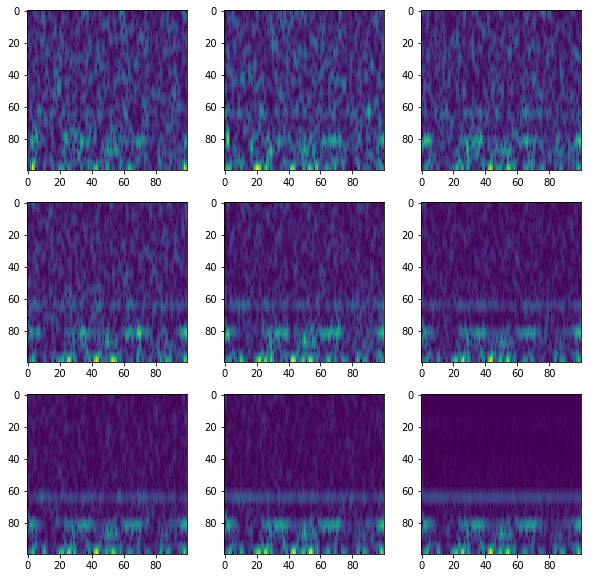

In [89]:
plt.figure(figsize = (10, 10))

plt.subplot(3, 3, 1); plt.imshow(np.squeeze(test_x_stft_m4[750], axis = 2))
plt.subplot(3, 3, 2); plt.imshow(np.squeeze(test_x_stft_m2[750], axis = 2))
plt.subplot(3, 3, 3); plt.imshow(np.squeeze(test_x_stft_0[750], axis = 2))
plt.subplot(3, 3, 4); plt.imshow(np.squeeze(test_x_stft_2[750], axis = 2))
plt.subplot(3, 3, 5); plt.imshow(np.squeeze(test_x_stft_4[750], axis = 2))
plt.subplot(3, 3, 6); plt.imshow(np.squeeze(test_x_stft_6[750], axis = 2))
plt.subplot(3, 3, 7); plt.imshow(np.squeeze(test_x_stft_8[750], axis = 2))
plt.subplot(3, 3, 8); plt.imshow(np.squeeze(test_x_stft_10[750], axis = 2))
plt.subplot(3, 3, 9); plt.imshow(np.squeeze(test_x_stft_v2[0], axis = 2))

plt.show()

In [85]:
preds_stft_m4 = model_pred(STFT_Res50_v2, test_x_stft_m4)
preds_stft_m2 = model_pred(STFT_Res50_v2, test_x_stft_m2)
preds_stft_0 = model_pred(STFT_Res50_v2, test_x_stft_0)
preds_stft_2 = model_pred(STFT_Res50_v2, test_x_stft_2)
preds_stft_4 = model_pred(STFT_Res50_v2, test_x_stft_4)
preds_stft_6 = model_pred(STFT_Res50_v2, test_x_stft_6)
preds_stft_8 = model_pred(STFT_Res50_v2, test_x_stft_8)
preds_stft_10 = model_pred(STFT_Res50_v2, test_x_stft_10)

Inference Time: 00:01:02
Inference Time: 00:01:02
Inference Time: 00:01:02
Inference Time: 00:01:03
Inference Time: 00:01:03
Inference Time: 00:01:03
Inference Time: 00:01:03
Inference Time: 00:01:03


In [101]:
preds_stft_v2_m4 = model_pred(STFT_v2_Res50_v2, test_x_stft_v2_m4)
preds_stft_v2_m2 = model_pred(STFT_v2_Res50_v2, test_x_stft_v2_m2)
preds_stft_v2_0 = model_pred(STFT_v2_Res50_v2, test_x_stft_v2_0)
preds_stft_v2_2 = model_pred(STFT_v2_Res50_v2, test_x_stft_v2_2)
preds_stft_v2_4 = model_pred(STFT_v2_Res50_v2, test_x_stft_v2_4)
preds_stft_v2_6 = model_pred(STFT_v2_Res50_v2, test_x_stft_v2_6)
preds_stft_v2_8 = model_pred(STFT_v2_Res50_v2, test_x_stft_v2_8)
preds_stft_v2_10 = model_pred(STFT_v2_Res50_v2, test_x_stft_v2_10)

Inference Time: 00:00:07
Inference Time: 00:00:06
Inference Time: 00:00:07
Inference Time: 00:00:07
Inference Time: 00:00:07
Inference Time: 00:00:07
Inference Time: 00:00:07
Inference Time: 00:00:07


# Model Evaluation

In [25]:
def accuracy(data_y, outputs):
    pred = np.argmax(outputs, axis = 1)
    true = np.argmax(data_y, axis = 1)
    acc = 100*np.mean(np.equal(true, pred))
    print("Accuracy: {:.2f} %".format(acc))
    return acc

def con_mat(data_y, outputs):
    pred = np.argmax(outputs, axis = 1)
    true = np.argmax(data_y, axis = 1)
    return confusion_matrix(true, pred)

def plot_con_mat(cm, value_size = 15, label_size = 10, mode = 'percent'):
    plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Blues)
    thresh = cm.max()/2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if mode == 'percent':
            value = np.round(cm[i, j]/(np.sum(cm, 1)[i]), 3)
        if mode == 'num':
            value = cm[i, j]
        plt.text(j, i, value,
                 fontsize = value_size,
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')
    plt.ylabel('True label', fontsize = label_size)
    plt.xlabel('Predicted', fontsize = label_size)
    plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 
               ['nor', 'ball_7', 'ball_14', 'ball_21', 'inner_7', 'inner_14', 'inner_21', 'outer_7', 'outer_14', 'outer_21'], 
               rotation=-90, fontsize = label_size)
    plt.yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 
               ['nor', 'ball_7', 'ball_14', 'ball_21', 'inner_7', 'inner_14', 'inner_21', 'outer_7', 'outer_14', 'outer_21'], 
               rotation=0, fontsize = label_size)

## Accuracy

In [26]:
accr_exp = accuracy(labels_exp, preds_exp)

Accuracy: 99.52 %


In [27]:
accr_exp_n = accuracy(labels_exp_n, preds_exp_n)

Accuracy: 92.28 %


In [28]:
accr_exp_m4 = accuracy(labels_exp_m4, preds_exp_m4)
accr_exp_m2 = accuracy(labels_exp_m2, preds_exp_m2)
accr_exp_0 = accuracy(labels_exp_0, preds_exp_0)
accr_exp_2 = accuracy(labels_exp_2, preds_exp_2)
accr_exp_4 = accuracy(labels_exp_4, preds_exp_4)
accr_exp_6 = accuracy(labels_exp_6, preds_exp_6)
accr_exp_8 = accuracy(labels_exp_8, preds_exp_8)
accr_exp_10 = accuracy(labels_exp_10, preds_exp_10)

Accuracy: 14.80 %
Accuracy: 29.30 %
Accuracy: 40.40 %
Accuracy: 40.50 %
Accuracy: 42.60 %
Accuracy: 46.60 %
Accuracy: 58.10 %
Accuracy: 73.80 %


In [29]:
accr_lin = accuracy(labels_lin, preds_lin)

Accuracy: 99.96 %


In [30]:
accr_lin_m4 = accuracy(labels_lin_m4, preds_lin_m4)
accr_lin_m2 = accuracy(labels_lin_m2, preds_lin_m2)
accr_lin_0 = accuracy(labels_lin_0, preds_lin_0)
accr_lin_2 = accuracy(labels_lin_2, preds_lin_2)
accr_lin_4 = accuracy(labels_lin_4, preds_lin_4)
accr_lin_6 = accuracy(labels_lin_6, preds_lin_6)
accr_lin_8 = accuracy(labels_lin_8, preds_lin_8)
accr_lin_10 = accuracy(labels_lin_10, preds_lin_10)

Accuracy: 16.00 %
Accuracy: 14.00 %
Accuracy: 24.00 %
Accuracy: 43.00 %
Accuracy: 50.00 %
Accuracy: 50.00 %
Accuracy: 50.00 %
Accuracy: 65.00 %


In [51]:
accr_stft_v0 = accuracy(labels_stft_v0, preds_stft_v0)

Accuracy: 96.80 %


In [72]:
accr_stft_v1 = accuracy(labels_stft_v1, preds_stft_v1)

Accuracy: 98.96 %


In [90]:
accr_stft_m4 = accuracy(labels_stft_m4, preds_stft_m4)
accr_stft_m2 = accuracy(labels_stft_m2, preds_stft_m2)
accr_stft_0 = accuracy(labels_stft_0, preds_stft_0)
accr_stft_2 = accuracy(labels_stft_2, preds_stft_2)
accr_stft_4 = accuracy(labels_stft_4, preds_stft_4)
accr_stft_6 = accuracy(labels_stft_6, preds_stft_6)
accr_stft_8 = accuracy(labels_stft_8, preds_stft_8)
accr_stft_10 = accuracy(labels_stft_10, preds_stft_10)

Accuracy: 22.60 %
Accuracy: 21.44 %
Accuracy: 31.54 %
Accuracy: 48.78 %
Accuracy: 60.58 %
Accuracy: 66.73 %
Accuracy: 70.78 %
Accuracy: 75.39 %


In [103]:
accr_stft_v2 = accuracy(labels_stft_v2, preds_stft_v2)

Accuracy: 99.88 %


In [102]:
accr_stft_v2_m4 = accuracy(labels_stft_v2_m4, preds_stft_v2_m4)
accr_stft_v2_m2 = accuracy(labels_stft_v2_m2, preds_stft_v2_m2)
accr_stft_v2_0 = accuracy(labels_stft_v2_0, preds_stft_v2_0)
accr_stft_v2_2 = accuracy(labels_stft_v2_2, preds_stft_v2_2)
accr_stft_v2_4 = accuracy(labels_stft_v2_4, preds_stft_v2_4)
accr_stft_v2_6 = accuracy(labels_stft_v2_6, preds_stft_v2_6)
accr_stft_v2_8 = accuracy(labels_stft_v2_8, preds_stft_v2_8)
accr_stft_v2_10 = accuracy(labels_stft_v2_10, preds_stft_v2_10)

Accuracy: 36.00 %
Accuracy: 46.70 %
Accuracy: 57.40 %
Accuracy: 67.70 %
Accuracy: 76.30 %
Accuracy: 76.00 %
Accuracy: 76.50 %
Accuracy: 77.90 %


## Confusion Matrix

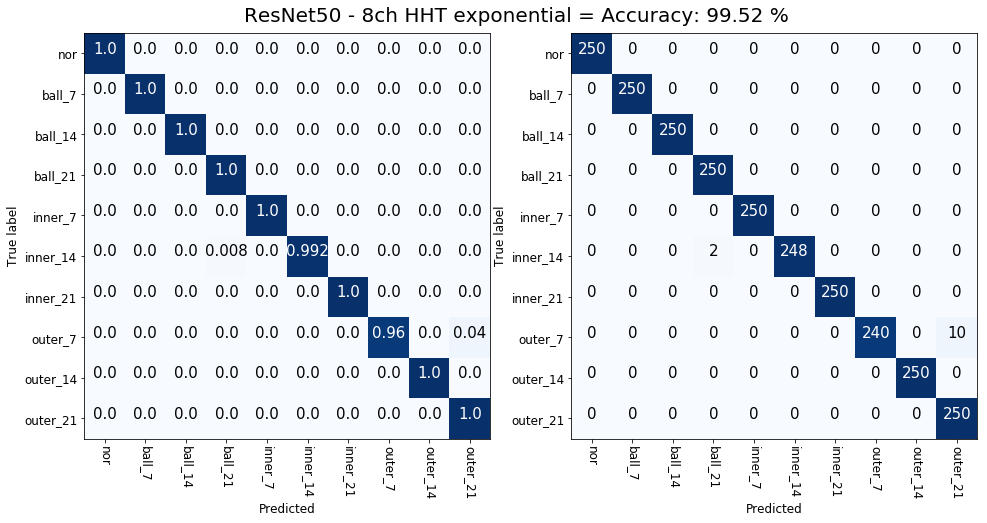

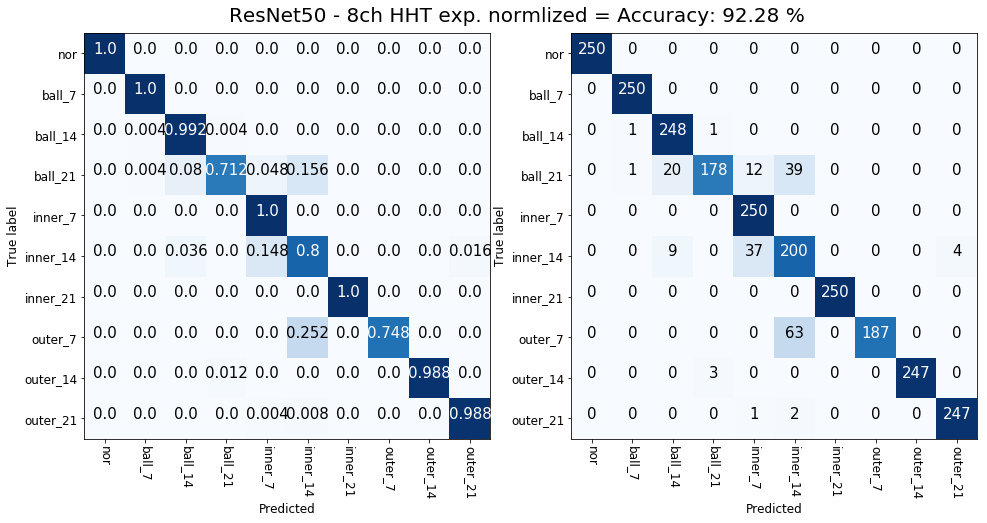

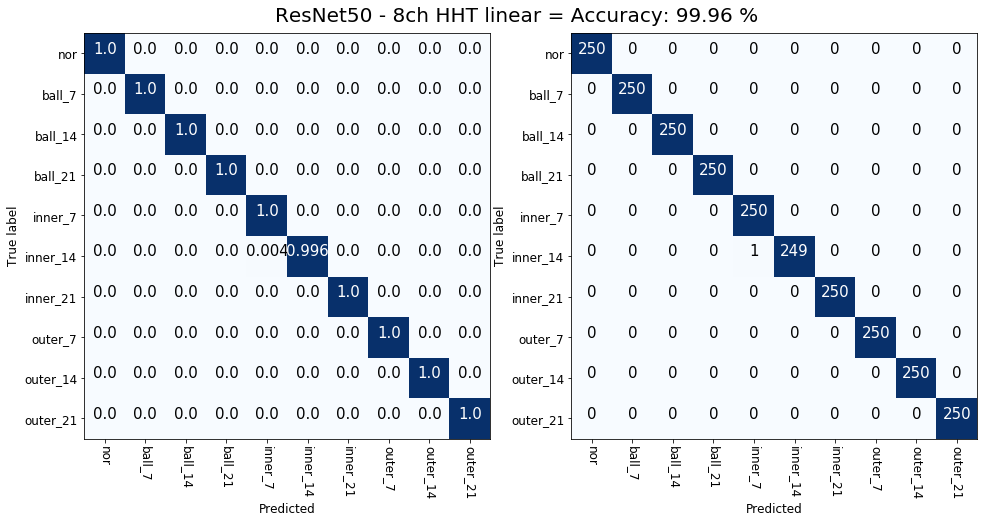

In [31]:
CM_exp = con_mat(labels_exp, preds_exp)
accr = 100*np.sum(np.diag(CM_exp))/np.sum(CM_exp)
plt.figure(figsize=(16, 8))
plt.suptitle('ResNet50 - 8ch HHT exponential = Accuracy: {:.2f} %'.format(accr), y = 0.90, fontsize = 20)
plt.subplot(121)
plot_con_mat(CM_exp, value_size = 15, label_size = 12)
plt.subplot(122)
plot_con_mat(CM_exp, value_size = 15, label_size = 12, mode = 'num')
plt.show()

CM_exp_n = con_mat(labels_exp_n, preds_exp_n)
accr = 100*np.sum(np.diag(CM_exp_n))/np.sum(CM_exp_n)
plt.figure(figsize=(16, 8))
plt.suptitle('ResNet50 - 8ch HHT exp. normlized = Accuracy: {:.2f} %'.format(accr), y = 0.90, fontsize = 20)
plt.subplot(121)
plot_con_mat(CM_exp_n, value_size = 15, label_size = 12)
plt.subplot(122)
plot_con_mat(CM_exp_n, value_size = 15, label_size = 12, mode = 'num')
plt.show()

CM_lin = con_mat(labels_lin, preds_lin)
accr = 100*np.sum(np.diag(CM_lin))/np.sum(CM_lin)
plt.figure(figsize=(16, 8))
plt.suptitle('ResNet50 - 8ch HHT linear = Accuracy: {:.2f} %'.format(accr), y = 0.90, fontsize = 20)
plt.subplot(121)
plot_con_mat(CM_lin, value_size = 15, label_size = 12)
plt.subplot(122)
plot_con_mat(CM_lin, value_size = 15, label_size = 12, mode = 'num')
plt.show()

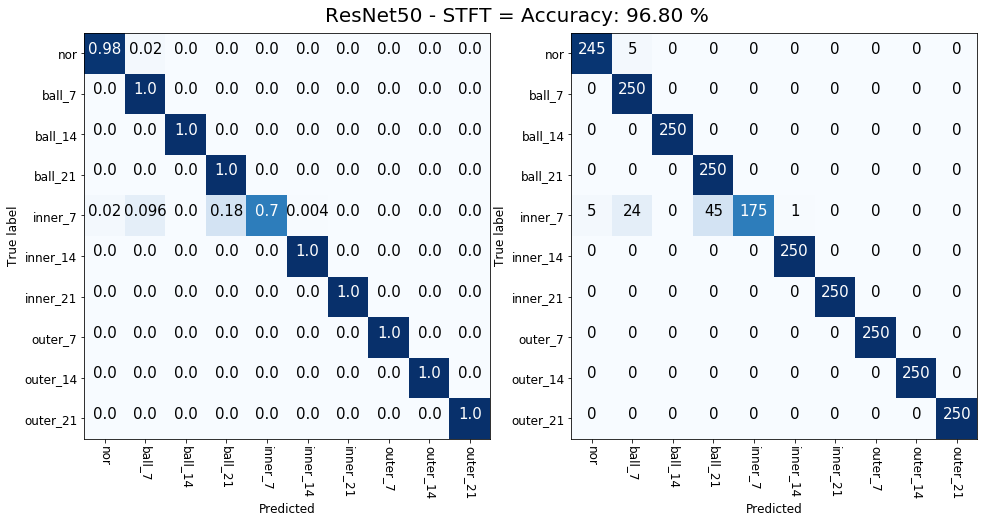

In [53]:
CM_stft_v0 = con_mat(labels_stft_v0, preds_stft_v0)
accr = 100*np.sum(np.diag(CM_stft_v0))/np.sum(CM_stft_v0)
plt.figure(figsize=(16, 8))
plt.suptitle('ResNet50 - STFT = Accuracy: {:.2f} %'.format(accr), y = 0.90, fontsize = 20)
plt.subplot(121)
plot_con_mat(CM_stft_v0, value_size = 15, label_size = 12)
plt.subplot(122)
plot_con_mat(CM_stft_v0, value_size = 15, label_size = 12, mode = 'num')
plt.show()

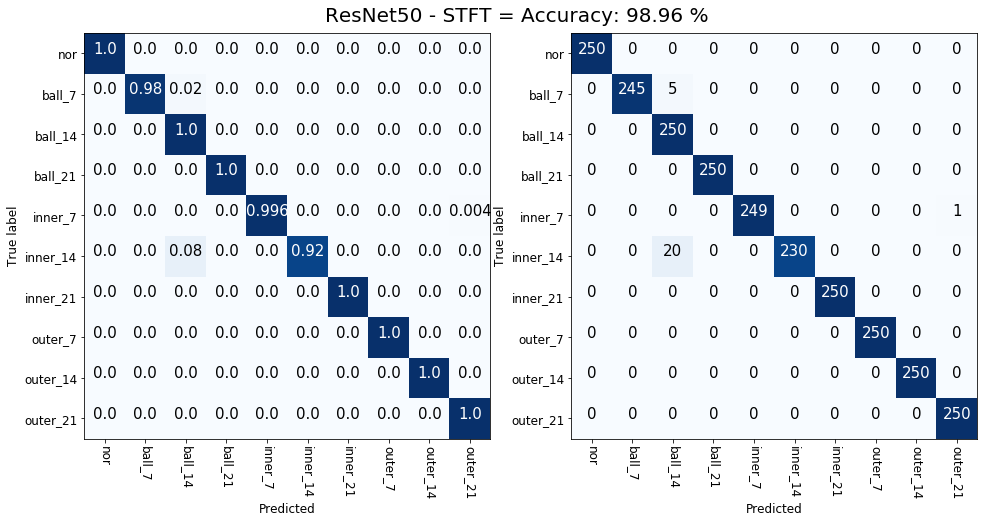

In [75]:
CM_stft_v1 = con_mat(labels_stft_v1, preds_stft_v1)
accr = 100*np.sum(np.diag(CM_stft_v1))/np.sum(CM_stft_v1)
plt.figure(figsize=(16, 8))
plt.suptitle('ResNet50 - STFT = Accuracy: {:.2f} %'.format(accr), y = 0.90, fontsize = 20)
plt.subplot(121)
plot_con_mat(CM_stft_v1, value_size = 15, label_size = 12)
plt.subplot(122)
plot_con_mat(CM_stft_v1, value_size = 15, label_size = 12, mode = 'num')
plt.show()

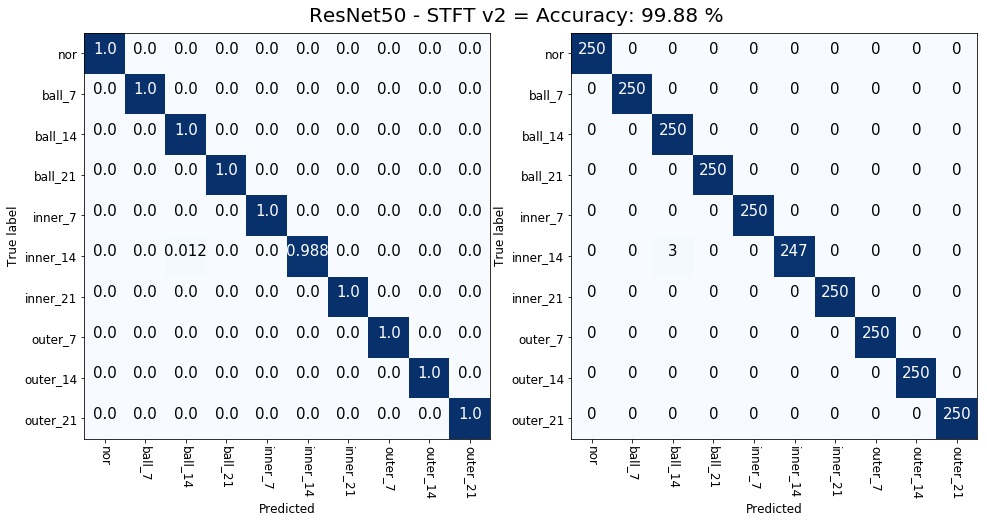

In [104]:
CM_stft_v2 = con_mat(labels_stft_v2, preds_stft_v2)
accr = 100*np.sum(np.diag(CM_stft_v2))/np.sum(CM_stft_v2)
plt.figure(figsize=(16, 8))
plt.suptitle('ResNet50 - STFT v2 = Accuracy: {:.2f} %'.format(accr), y = 0.90, fontsize = 20)
plt.subplot(121)
plot_con_mat(CM_stft_v2, value_size = 15, label_size = 12)
plt.subplot(122)
plot_con_mat(CM_stft_v2, value_size = 15, label_size = 12, mode = 'num')
plt.show()

## Training history

In [36]:
hist_accr_exp = np.load('/mnt/disk1/yunseob/courses/19-2_computer vision/history/ResNet50_HHT_accr.npy')
hist_accr_exp_n = np.load('/mnt/disk1/yunseob/courses/19-2_computer vision/history/ResNet50_HHT_norm_accr.npy')
hist_accr_lin = np.load('/mnt/disk1/yunseob/courses/19-2_computer vision/history/ResNet50_HHT_6000_accr.npy')
hist_loss_exp = np.load('/mnt/disk1/yunseob/courses/19-2_computer vision/history/ResNet50_HHT_loss.npy')
hist_loss_exp_n = np.load('/mnt/disk1/yunseob/courses/19-2_computer vision/history/ResNet50_HHT_norm_loss.npy')
hist_loss_lin = np.load('/mnt/disk1/yunseob/courses/19-2_computer vision/history/ResNet50_HHT_6000_loss.npy')

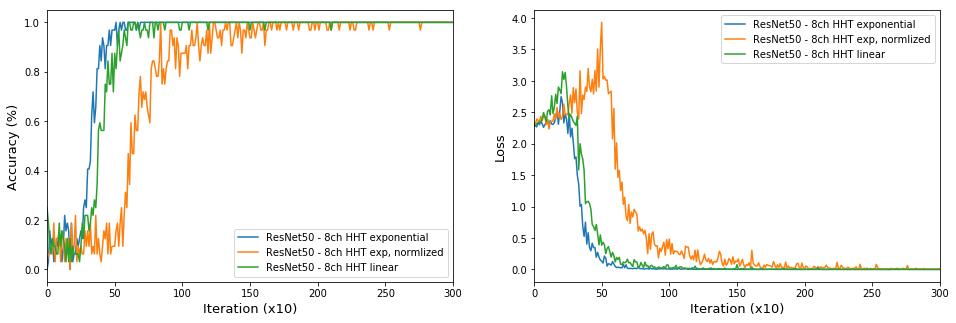

In [37]:
plt.figure(figsize = (16, 5))

plt.subplot(121)
plt.plot(hist_accr_exp, label = 'ResNet50 - 8ch HHT exponential')
plt.plot(hist_accr_exp_n, label = 'ResNet50 - 8ch HHT exp, normlized')
plt.plot(hist_accr_lin, label = 'ResNet50 - 8ch HHT linear')
plt.legend(fontsize = 10)
plt.xlim([0, 300])
plt.xlabel('Iteration (x10)', fontsize = 13)
plt.ylabel('Accuracy (%)', rotation = 90, fontsize = 13)

plt.subplot(122)
plt.plot(hist_loss_exp, label = 'ResNet50 - 8ch HHT exponential')
plt.plot(hist_loss_exp_n, label = 'ResNet50 - 8ch HHT exp, normlized')
plt.plot(hist_loss_lin, label = 'ResNet50 - 8ch HHT linear')
plt.legend(fontsize = 10)
plt.xlim([0, 300])
plt.xlabel('Iteration (x10)', fontsize = 13)
plt.ylabel('Loss', rotation = 90, fontsize = 13)
plt.show()

## Noise Analysis

In [38]:
ResNet50_accr_exp_noise = [accr_exp_m4, accr_exp_m2, accr_exp_0, accr_exp_2, accr_exp_4, accr_exp_6, accr_exp_8, accr_exp_10]
ResNet50_accr_lin_noise = [accr_lin_m4, accr_lin_m2, accr_lin_0, accr_lin_2, accr_lin_4, accr_lin_6, accr_lin_8, accr_lin_10]
ResNet50_accr_stft_noise = [accr_stft_m4, accr_stft_m2, accr_stft_0, accr_stft_2, accr_stft_4, accr_stft_6, accr_stft_8, accr_stft_10]

In [105]:
ResNet50_accr_stft_v2_noise = [accr_stft_v2_m4, accr_stft_v2_m2, accr_stft_v2_0, accr_stft_v2_2, accr_stft_v2_4, accr_stft_v2_6, accr_stft_v2_8, accr_stft_v2_10]

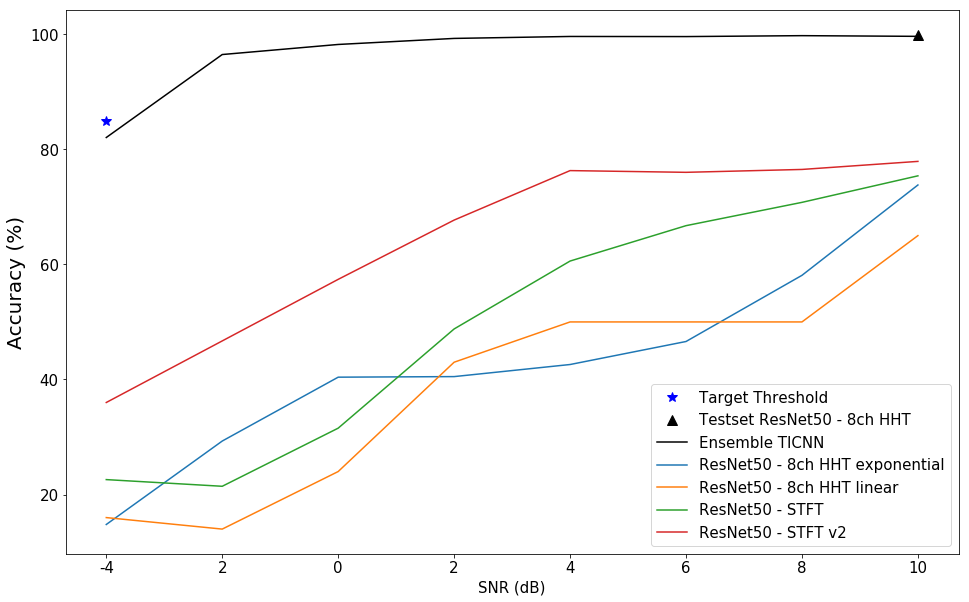

In [106]:
plt.figure(figsize = (16, 10))
plt.plot(0, 85, 'b*', markersize = 10, label = 'Target Threshold')
plt.plot(7, accr, 'k^', markersize = 10, label = 'Testset ResNet50 - 8ch HHT')
plt.plot([82.05, 96.47, 98.22, 99.27, 99.61, 99.59, 99.75, 99.63], 'k', label = 'Ensemble TICNN')
plt.plot(ResNet50_accr_exp_noise, label = 'ResNet50 - 8ch HHT exponential')
plt.plot(ResNet50_accr_lin_noise, label = 'ResNet50 - 8ch HHT linear')
plt.plot(ResNet50_accr_stft_noise, label = 'ResNet50 - STFT')
plt.plot(ResNet50_accr_stft_v2_noise, label = 'ResNet50 - STFT v2')
plt.legend(loc = 4, fontsize = 15)
plt.xlabel('SNR (dB)', fontsize = 15)
plt.yticks(fontsize =15)
plt.ylabel('Accuracy (%)', rotation = 90, fontsize = 20)
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7], [-4, 2, 0, 2, 4, 6, 8, 10], fontsize =15)
plt.show()